In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [5]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
https://www.tensorflow.org/guide/keras/sequential_model

A Sequential model is not appropriate when:
* Your model has multiple inputs or multiple outputs
* Any of your layers has multiple inputs or multiple outputs
* You need to do layer sharing
* You want non-linear topology (e.g. a residual connection, a multi-branch model)


In [6]:
# One layer sequential model
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[1])
])

#Loss function — A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss".)
#Optimizer function — A way of adjusting internal values in order to reduce the loss.
model.compile(loss='mean_squared_error',
             optimizer=keras.optimizers.Adam(0.1))

In [7]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)

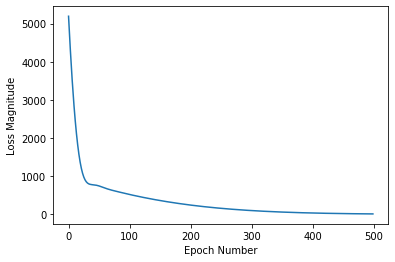

In [8]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [9]:
print(model.predict([100.0]))

[[211.30083]]


In [36]:
# Dense sequential model
dense_model = keras.Sequential([
    layers.Dense(1, name="layer1"),
    layers.Dense(3, name="layer2"),
    layers.Dense(1, name="layer3"),
])
dense_model.compile(loss='mean_squared_error',
             optimizer=keras.optimizers.Adam(0.1))

In [37]:
dense_history = dense_model.fit(celsius_q, fahrenheit_a, epochs=100, verbose=False)

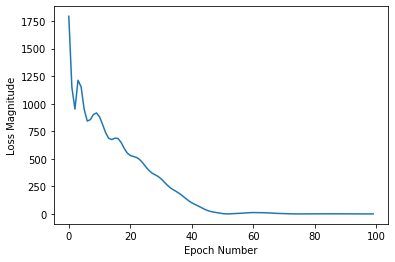

In [38]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(dense_history.history['loss'])

In [39]:
print(dense_model.predict([100.0]))

[[211.28947]]
